$$ \huge{Домашнее \space задание \space № \space 2}$$


$$\large{Федоров \space Павел\space Сергеевич \space 172}$$

$$Прикладная \space статистика \space в \space машинном \space обучении$$

## Задание 1

**Постройте распределение плотности вероятностей для pзначения в случаях, если нулевая гипотеза верна и не верна, для
следующих случаев:**

1. Одновыборочный t-тест для $X1, . . . Xn ∼ N(x; µ, 1)$,
для проверки нулевой гипотезы $H_0: µ_0 = 0$, против альтернативной гипотезы $H_a: µ_0 > 0$. Для $µ = 0, µ = 0,5$ и $µ = 1$
Тестирование проводите в случае, если $n = 4.$

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, lognorm, distributions, ttest_1samp, expon, ttest_ind, mannwhitneyu, binom_test
import warnings
warnings.filterwarnings('ignore')

In [2]:
def ttest(a, popmean):
    df = len(a) - 1
    denom = np.sqrt(np.var(a, ddof=1) / len(a))
    t = np.divide(np.mean(a) - popmean, denom)
    prob = np.abs(distributions.t.sf(np.abs(t), df))
    return t, prob

In [3]:
mu_s = [0, 0.5, 1]
p_values = {0: [], 0.5: [], 1: []}
for i in range(1000):
    X = norm.rvs(loc=0, scale=1, size=4)
    for mu in mu_s:
        _, p = ttest(X, mu)
        p_values[mu].append(p)

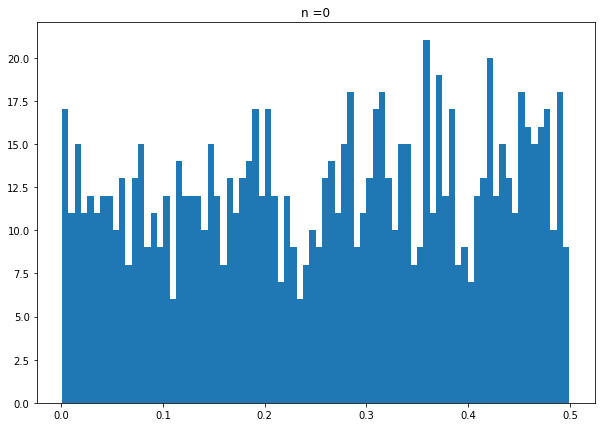

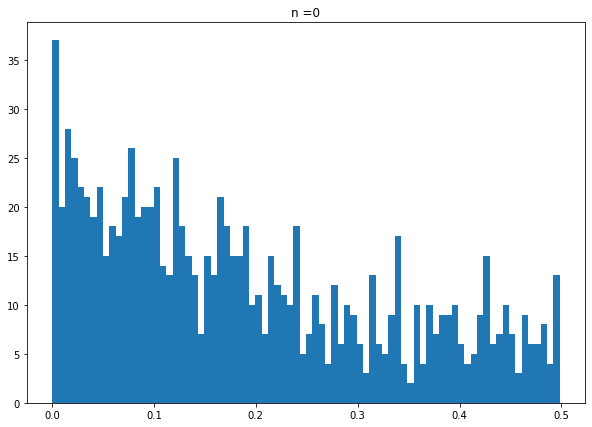

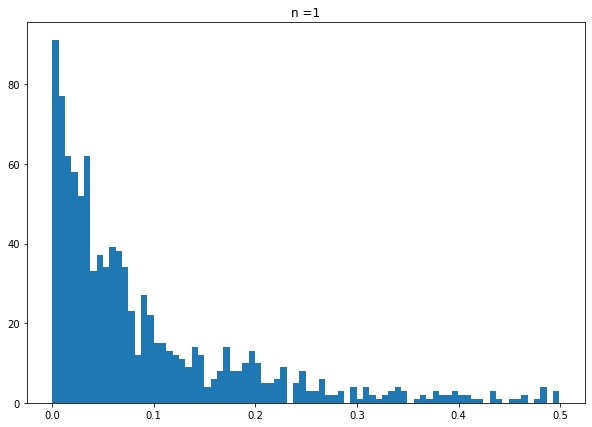

In [4]:
for i in mu_s:
    plt.figure(figsize=(10, 7))
    plt.title("n =%d" % i)
    plt.hist(p_values[i], bins=80)
    plt.show()

2. Одновыборочный t-тест для $X1, . . . Xn ∼ exp(x; 1)$,
для проверки нулевой гипотезы $H_0: µ_0 = 1$, против альтернативной гипотезы $H_a: µ_0 > 1$. Тестирование проводите в случае, если $n = 4, 10, 100$. Сделайте вывод о применимости метода анализа множественного тестирования $Storey-Tibshirani$
(лекция, раздел $FDR$ и Теорема байеса).

In [5]:
p_values = {4: [], 10: [], 100: []}
n_s = [4, 10, 100]
mu = 1
for i in range(1000):
    for n in n_s:
        X = expon.rvs(loc=0, scale=1, size=n)
        _, p = ttest(X, mu)
        p_values[n].append(p)

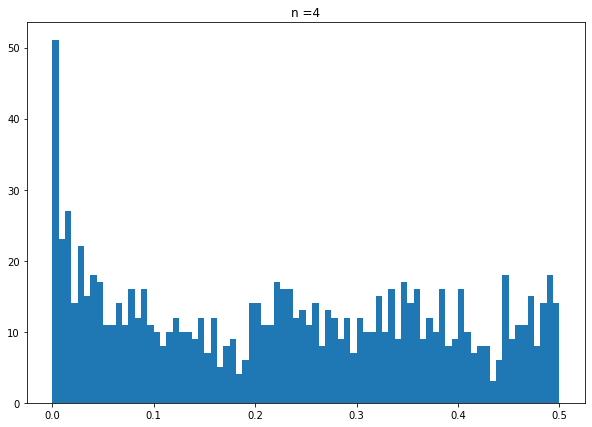

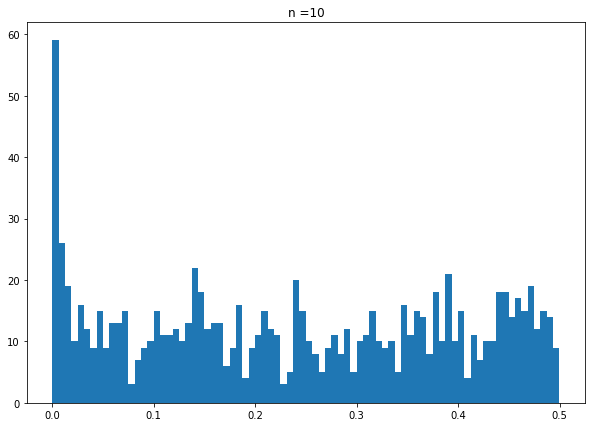

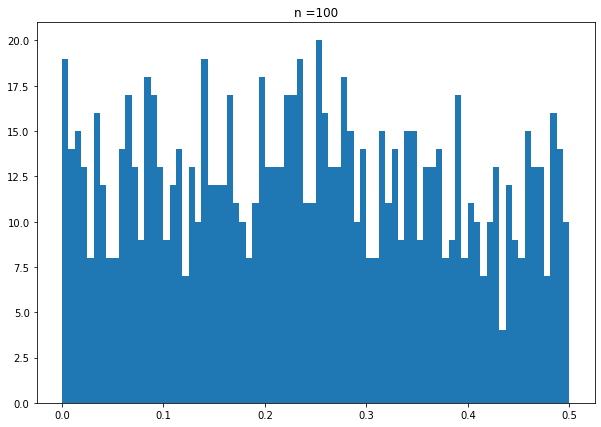

In [6]:
for i in ns:
    plt.figure(figsize=(10, 7))
    plt.title("n =%d" % i)
    plt.hist(p_values[i], bins=80)
    plt.show()

## Задание 2

In [7]:
from statsmodels.sandbox.stats.runs import runstest_2samp

def sign (x1, x2):
    pos = (x1 > x2).sum()
    neg = (x1 < x2).sum()
    return binom_test(min(pos, neg), pos + neg, 0.5)

def make_dist(di, d, s, m):
    if di == 0:
        return norm.rvs(loc = m, scale = s, size = d)
    elif di == 1:
        return lognorm.rvs(loc=(-1)*m, scale=1/s, size=d, s=1)
    else:
        return expon.rvs(size=d)

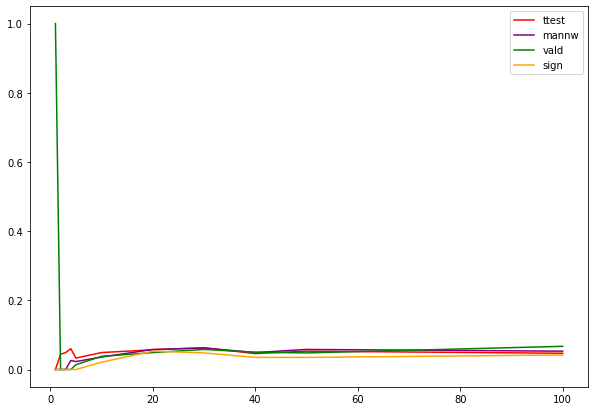

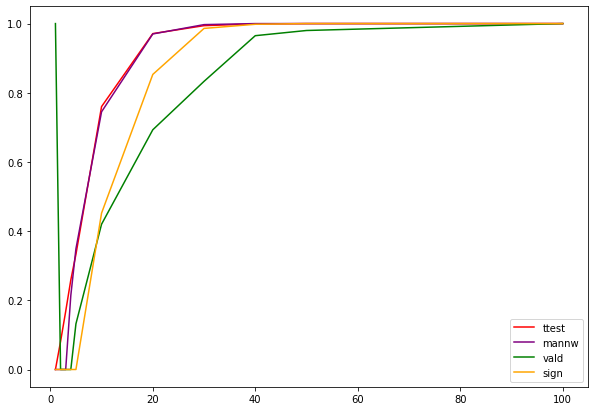

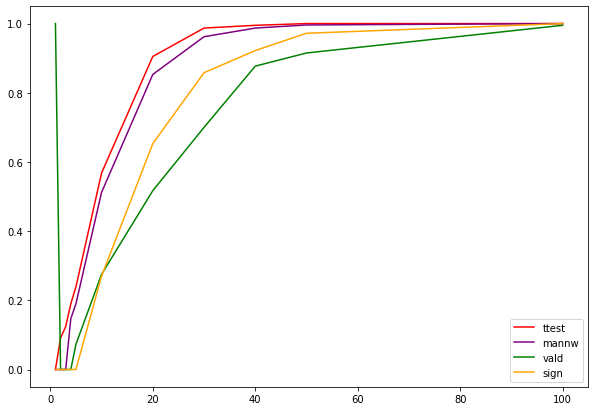

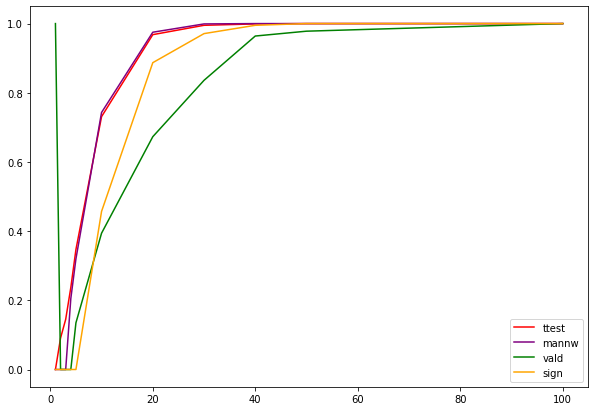

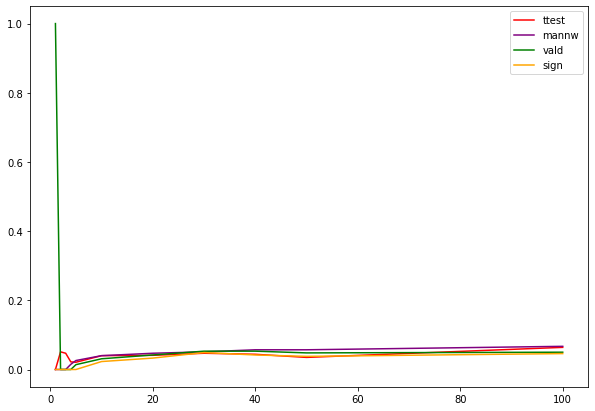

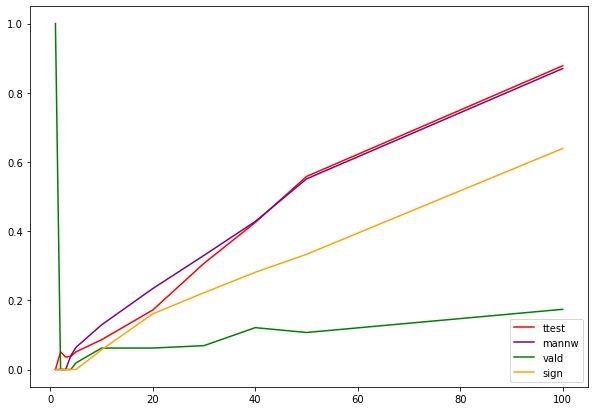

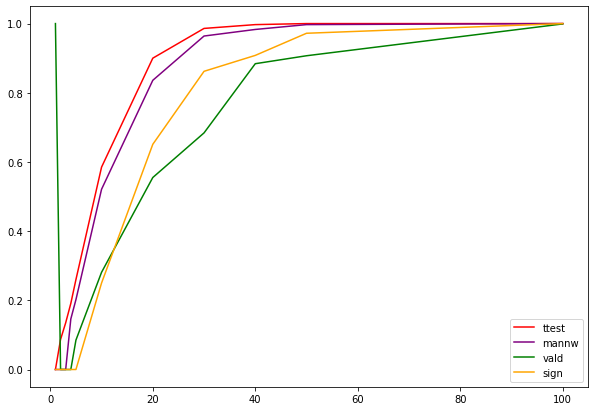

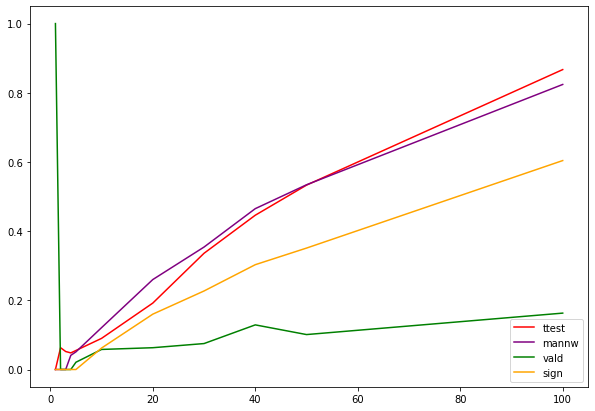

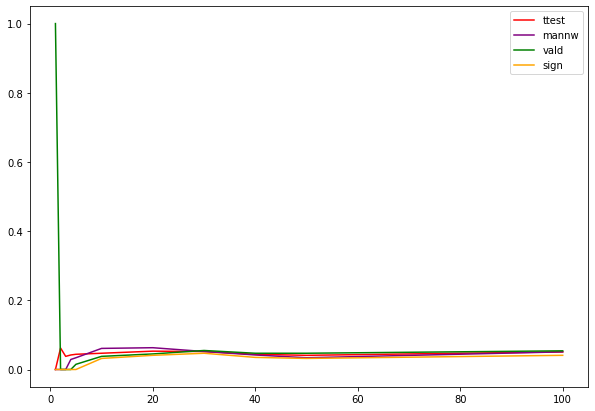

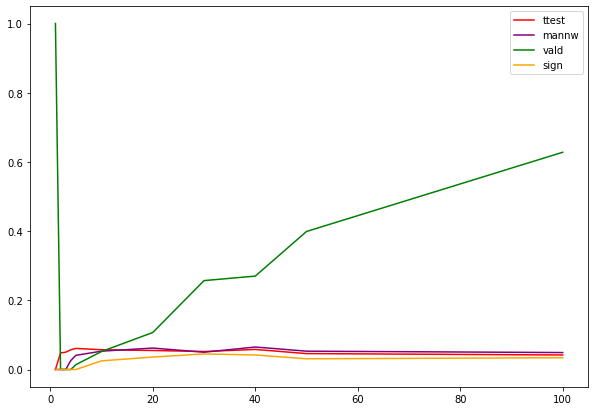

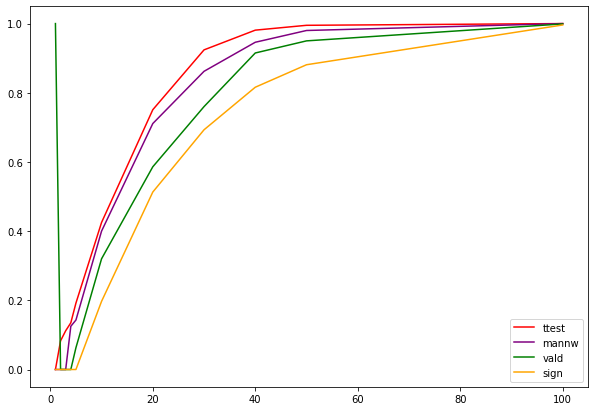

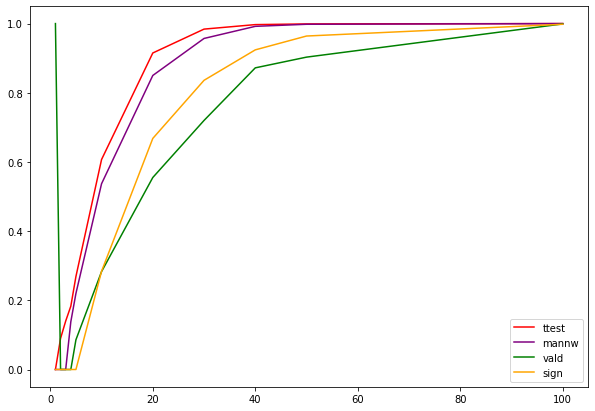

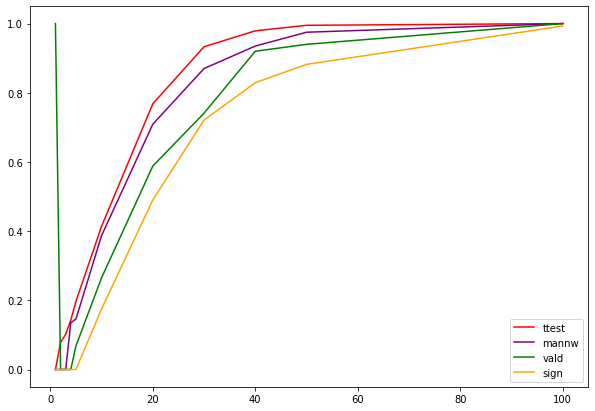

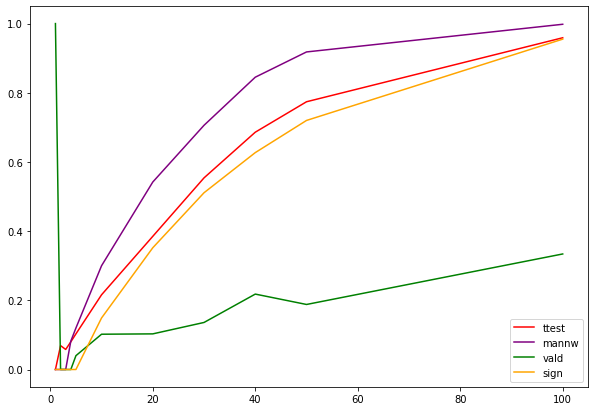

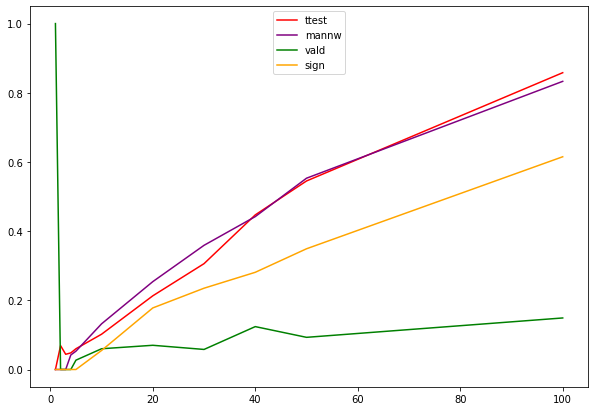

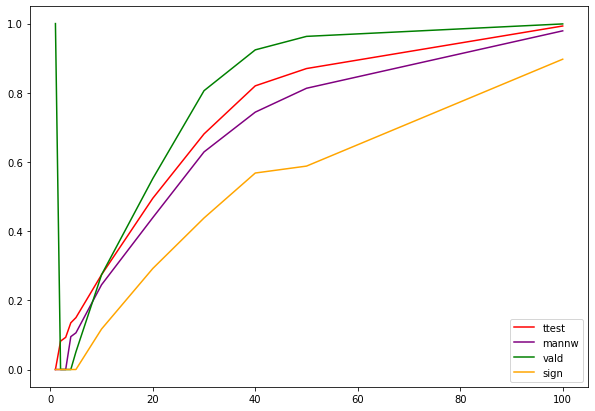

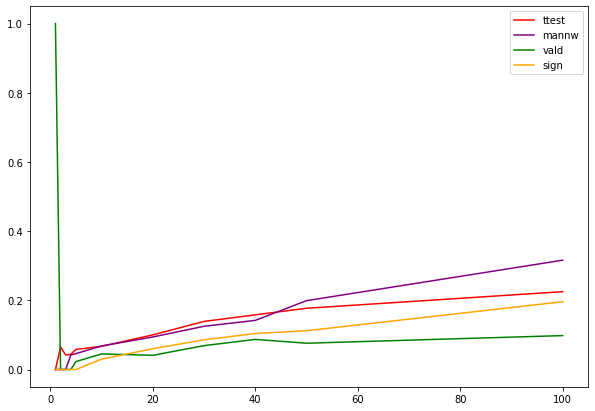

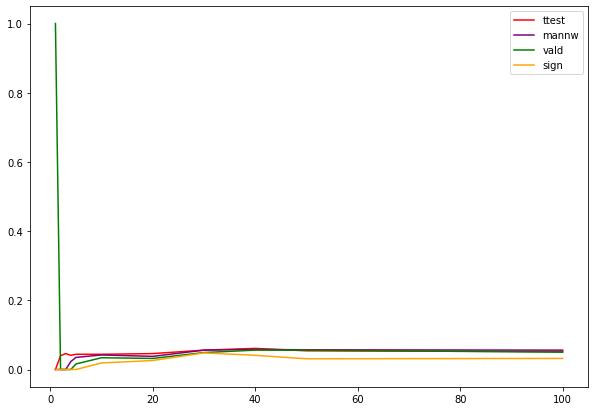

In [8]:
sigma1 = sigma2 = 1
mu = 0
N = 1000
alpha = 0.05
D = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100]
dist = [0, 1, 2]

for name in ["same", "dif"]:
    for i in range(3):
        for j in range(3):
            res_ttest = []
            res_mannw = []
            res_vald = []
            res_sign = []
            for d in D:
                an_ttest = 0
                an_mannw = 0
                an_vald = 0
                an_sign = 0

                if (name == "dif"):
                    sigma2 = 2

                for l in range(N):
                    X = make_dist(dist[i], d, sigma1, mu)
                    Y = make_dist(dist[j], d, sigma2, mu)
                    if ttest_ind(X, Y)[1] < alpha:
                        an_ttest += 1
                    elif mannwhitneyu(X, Y, alternative = 'two-sided')[1] < alpha:
                        an_mannw += 1
                    elif runstest_2samp(X, Y)[1] < alpha:
                        an_vald += 1
                    elif sign(X, Y) < alpha:
                        an_sign += 1

                sigma2 = 1
                
                res_vald.append(an_vald / N)
                res_sign.append(an_sign / N)
                res_ttest.append(an_ttest / N)
                res_mannw.append(an_mannw / N)

            plt.figure(figsize=(10, 7))
            plt.plot(D, res_ttest, color = 'red', label = 'ttest')
            plt.plot(D, res_mannw, color = 'purple', label = 'mannw')
            plt.plot(D, res_vald, color = 'green', label = 'vald')
            plt.plot(D, res_sign, color = 'orange', label = 'sign')
            plt.legend()
            plt.show()

## Задание 3

In [9]:
data = pd.read_csv('v2_bombing_london.csv')
data.head()

,Unnamed: 0,Name,Description,x,y
0,0,New Cross Road,"<img src=""https://lh6.googleusercontent.com/pr...",-0.038903,51.475529
1,1,"Hughes Mansions, Vallance Road","March 27, 1945, 134 Dead. Final V2 to hit London.",-0.063665,51.521308
2,2,Smithfield Market,"March 8 1945, 110 Dead<br><br>Comment from Mar...",-0.104971,51.518978
3,3,Mackenzie Road,"December 26, 1944, 68 Dead. Prince of Wales pu...",-0.112395,51.549057
4,4,Trundleys Road,"March 7, 1945, 53 Dead.",-0.041606,51.484055


In [10]:
from scipy.stats import chisquare
alpha = 0.05

chisquare(np.histogram2d(data.x, data.y, 10)[0].ravel())[1] < alpha

True

## Задание 4
**Вы попадаете на остров, на котором живёт племя туземцев. Вы считаете, что племя – часть определённого народа с характерной долей 1-й группы крови. Какое минимальное число n
анализов крови нужно сделать, чтобы подтвердить вашу гипотезу с погрешностью не более $∆ = 0.02$, с вероятностью $q > 0.95$?
Рассмотрите отдельно общий случай (людей на острове бесконечно много).**

$p_0$ - искомая доля людей с 1-ой группой. Можно заметить, что n анализов формируют схему Бернулли. Стандарное отклонение числа успешных анализов в общем случае будет $\sqrt{np_0q_0}$ и максимум будет при $p_0 = \frac{1}{2}$. Тогда стандартное отклонение будет $\sqrt{\frac{p_0q_0}{n}}$ и в крайнем случае $\sqrt{\frac{0.25}{n}}$
Согласно ЦПТ, для больших n можно оценить 95% доверительный интервал для $p_0$ нормальным доверительным интервалом.

In [11]:
norm.interval(0.95)

(-1.959963984540054, 1.959963984540054)

Он лежит в пределах 1.96$\sigma$, где $\sigma$ ~ $\sqrt{\frac{p_0q_0}{n}}$.
Погрешность = 0.02, $\rightarrow$ 
$$1.96\sqrt{\frac{p_0q_0}{n}} \leq 0.02 \rightarrow \frac{p_0q_0}{(\frac{0.02}{1.96})^2} \leq n \rightarrow$$

Т. к. в худшем случае $p_0 = 0.5$, то $n \geq 2401$ 